In [1]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv(r'C:\Users\Archana\OneDrive\Desktop\CAPSTONE PORJECT\DATASETS\Disease prediction - symptom based\training_data.csv')

In [3]:
# Load the dataset
test_df = pd.read_csv(r'C:\Users\Archana\OneDrive\Desktop\CAPSTONE PORJECT\DATASETS\Disease prediction - symptom based\testing_data.csv')

In [5]:
def vectorize_dataset(train_df,test_df):
    global matrix, vec
    train_df.iloc[:,1:] = train_df.iloc[:,1:].fillna('')
    train_df['symptoms'] = train_df.iloc[:,1:].apply(lambda x:', '.join(x),axis=1)
    test_df.iloc[:,1:] = test_df.iloc[:,1:].fillna('')
    test_df['symptoms'] = test_df.iloc[:,1:].apply(lambda x:', '.join(x),axis=1)
    
    vec = CountVectorizer()
    
    matrix = vec.fit_transform(train_df['symptoms'])
    train_df = pd.DataFrame(matrix.toarray(),columns=vec.get_feature_names_out(),index=train_df['Disease'])
    train_df['Disease'] = train_df.index

    matrix = vec.transform(test_df['symptoms'])
    test_df = pd.DataFrame(matrix.toarray(),columns=vec.get_feature_names_out(),index=test_df['Disease'])
    test_df['Disease'] = test_df.index

    return train_df,test_df


In [6]:
train_df,test_df = vectorize_dataset(train_df,test_df)

In [10]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split( train_df.iloc[:,:-1].values,train_df.index,stratify=train_df.index,test_size=0.2,random_state = 42)

In [12]:
x_test = test_df.iloc[:,:-1].values
y_test = test_df.index.values

In [40]:
clf = MultinomialNB()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [14]:
preds = clf.predict(x_test)

In [15]:
accuracy_score(y_test,preds)

0.973170731707317

In [16]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics.pairwise import cosine_similarity

In [17]:
disease_list= np.unique(y_train).tolist()

In [18]:
disease_list.sort()

In [19]:
mean_symptoms = np.zeros((len(disease_list),x_test.shape[1]))

In [20]:
for i in range(len(disease_list)):
    mean_symptoms[i] = x_test[np.where(y_test==disease_list[i])].mean(axis=0)

In [21]:
sim_df = pd.DataFrame(cosine_similarity(mean_symptoms),index=disease_list,columns=disease_list)

<AxesSubplot:>

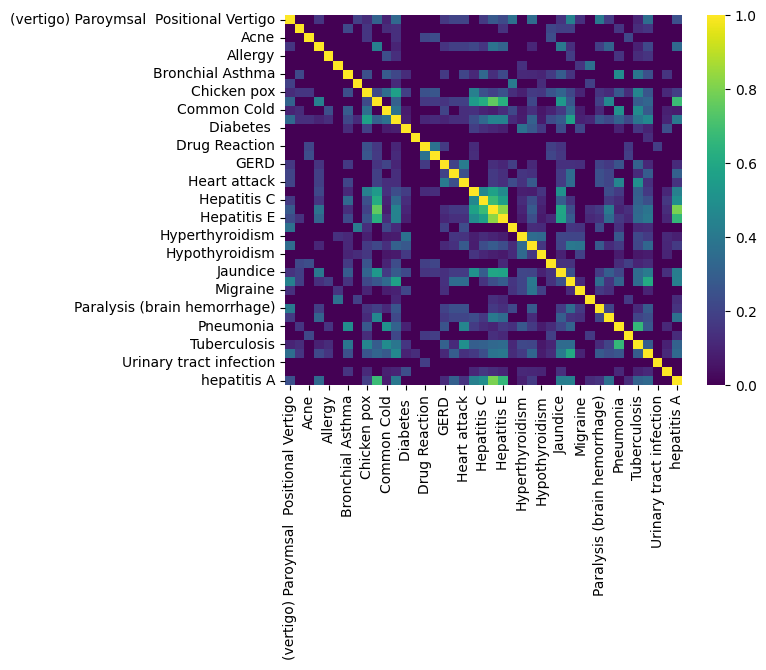

In [22]:
sns.heatmap(sim_df,cmap='viridis')

In [23]:
conf_df = pd.DataFrame(confusion_matrix(y_test,preds,labels=disease_list),index=disease_list,columns=disease_list)

<AxesSubplot:>

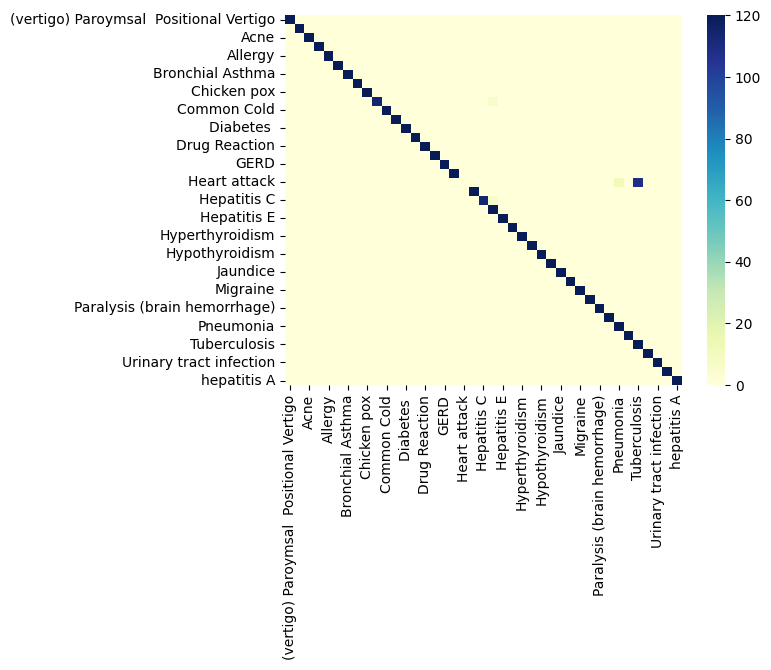

In [24]:
sns.heatmap(conf_df,cmap='YlGnBu')

In [32]:
results = ['Hypertension '
,'Heart attack'
,'Alcoholic hepatitis'
,'Chronic cholestasis'
,'Urinary tract infection'
,'(vertigo) Paroymsal  Positional Vertigo'
,'Hypoglycemia'
,'Osteoarthristis'
,'AIDS']


In [33]:
x_temp = vec.transform(['chest_pain,dizziness,headache,loss_of_balance'
,'breathlessness,chest_pain,sweating,vomiting'
,'abdominal_pain,distention_of_abdomen,fluid_overload,history_of_alcohol_consumption,swelling_of_stomach,vomiting'
,'abdominal_pain,itching,loss_of_appetite,nausea,vomiting,yellowing_of_eyes,yellowish_skin'
,'bladder_discomfort,burning_micturition,continuous_feel_of_urine'
,'headache,loss_of_balance,spinning_movements,unsteadiness,vomiting'
,'anxiety,blurred_and_distorted_vision,drying_and_tingling_lips,excessive_hunger,fatigue,headache,irritability,nausea,palpitations,slurred_speech,sweating,vomiting'
,'hip_joint_pain,joint_pain,knee_pain,neck_pain,painful_walking,swelling_joints'
,'extra_marital_contacts,high_fever,muscle_wasting,patches_in_throat']).toarray()

In [38]:
clf.predict(x_temp)

array(['Hypertension ', 'Tuberculosis', 'Alcoholic hepatitis',
       'Chronic cholestasis', 'Urinary tract infection',
       '(vertigo) Paroymsal  Positional Vertigo', 'Hypoglycemia',
       'Osteoarthristis', 'AIDS'], dtype='<U39')

In [39]:
clf.predict(x_temp)==results

array([ True, False,  True,  True,  True,  True,  True,  True,  True])